# AnnotationSampler

In [38]:
from wholeslidedata.samplers.annotationsampler import OrderedAnnotationSampler, BalancedAnnotationSampler, AreaAnnotationSampler
from wholeslidedata import WholeSlideAnnotation
from wholeslidedata.visualization.plotting import plot_annotations
from matplotlib import pyplot as plt
from sourcelib.collect import get_files_from_folder
from sourcelib.associations import associate_files
from wholeslidedata.data.files import WholeSlideImageFile, WholeSlideAnnotationFile
from wholeslidedata.data.mode import WholeSlideMode
from wholeslidedata.interoperability.asap.backend import AsapWholeSlideImageBackend
from wholeslidedata.interoperability.asap.parser import AsapAnnotationParser
from wholeslidedata.data.dataset import WholeSlideDataSet
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt

In [32]:
image_files = get_files_from_folder(file_cls=WholeSlideImageFile, folder='/tmp/', mode=WholeSlideMode.default, excludes=['mask'], image_backend=AsapWholeSlideImageBackend)
annotation_files =get_files_from_folder(file_cls=WholeSlideAnnotationFile, folder='/tmp/', mode=WholeSlideMode.default, filters=['xml'], annotation_parser=AsapAnnotationParser)
associations = associate_files(image_files, annotation_files)
dataset = WholeSlideDataSet(mode=WholeSlideMode.training, associations=associations)

## OrderedAnnotationSampler

In [36]:
annotation_sampler = OrderedAnnotationSampler(counts_per_label=dataset.annotation_counts_per_label, seed=123)
for label, counts in  dataset.annotation_counts_per_label.items():
    for i in range(counts):
        print(label, 'annotation index', next(annotation_sampler)(label))

lymphocytes annotation index 0
lymphocytes annotation index 1
lymphocytes annotation index 2
tumor annotation index 0
tumor annotation index 1
tumor annotation index 2
tumor annotation index 3
tumor annotation index 4
stroma annotation index 0
stroma annotation index 1


## BalancedAnnotationSampler

In [37]:
annotation_sampler = BalancedAnnotationSampler(counts_per_label=dataset.annotation_counts_per_label, seed=123)
for label, counts in  dataset.annotation_counts_per_label.items():
    for i in range(counts):
        print(label, 'annotation index', next(annotation_sampler)(label))

lymphocytes annotation index 0
lymphocytes annotation index 1
lymphocytes annotation index 2
tumor annotation index 1
tumor annotation index 3
tumor annotation index 4
tumor annotation index 0
tumor annotation index 2
stroma annotation index 1
stroma annotation index 0


## AreaAnnotationSampler

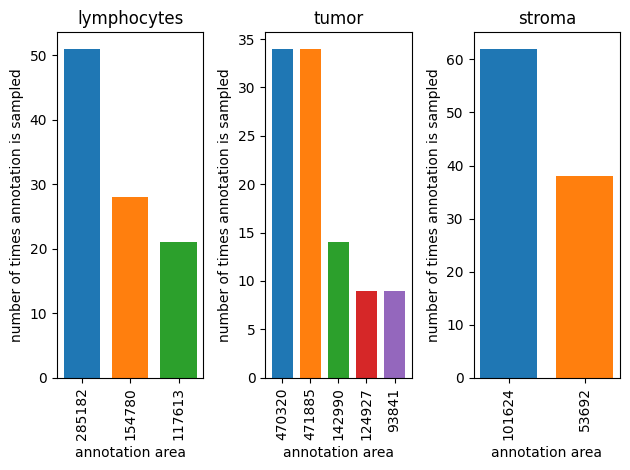

In [113]:
annotation_sampler = AreaAnnotationSampler(counts_per_label=dataset.annotation_counts_per_label, dataset=dataset, seed=123)
fig, axes = plt.subplots(1,3)
for ax_idx, (label, counts) in enumerate(dataset.annotation_counts_per_label.items()):
    sampled_indexes = Counter()
    for i in range(100):
        annotation_index = next(annotation_sampler)(label)
        sampled_indexes[annotation_index] += 1
    areas = []
    for ax_size, (index,value) in enumerate(sampled_indexes.most_common()):
        sample_reference = dataset.sample_references[label][index]
        annotation = dataset.get_annotation_from_reference(sample_reference)
        axes[ax_idx].bar(0.1 + ax_size*0.2, value,  width=0.15, label=annotation.area)
        areas.append(annotation.area)
    axes[ax_idx].set_xticks([0.1+i*0.2 for i in range(len(areas))], areas, rotation='vertical')
    axes[ax_idx].set_title(f'{label}')
    axes[ax_idx].set_xlabel('annotation area')
    axes[ax_idx].set_ylabel('number of times annotation is sampled')
plt.tight_layout()
plt.show()


### Annotation area weight

to smooth sampling

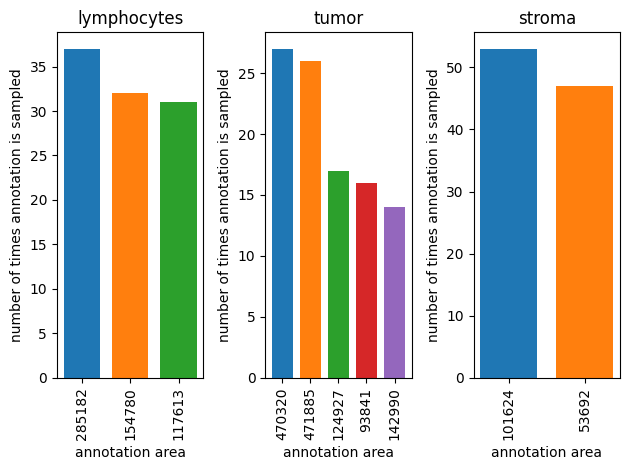

In [117]:
annotation_sampler = AreaAnnotationSampler(counts_per_label=dataset.annotation_counts_per_label, dataset=dataset, seed=123, weight=0.25)
fig, axes = plt.subplots(1,3)
for ax_idx, (label, counts) in enumerate(dataset.annotation_counts_per_label.items()):
    sampled_indexes = Counter()
    for i in range(100):
        annotation_index = next(annotation_sampler)(label)
        sampled_indexes[annotation_index] += 1
    areas = []
    for ax_size, (index,value) in enumerate(sampled_indexes.most_common()):
        sample_reference = dataset.sample_references[label][index]
        annotation = dataset.get_annotation_from_reference(sample_reference)
        axes[ax_idx].bar(0.1 + ax_size*0.2, value,  width=0.15, label=annotation.area)
        areas.append(annotation.area)
    axes[ax_idx].set_xticks([0.1+i*0.2 for i in range(len(areas))], areas, rotation='vertical')
    axes[ax_idx].set_title(f'{label}')
    axes[ax_idx].set_xlabel('annotation area')
    axes[ax_idx].set_ylabel('number of times annotation is sampled')
plt.tight_layout()
plt.show()